<h1>FD004 Tuned CNN Model Training</h1>
<ul>
    <li>Loading training and validation data</li>
    <li>Loading tuned model (best model from hyper tuning trials)</li>
    <li>Tuned model training</li>
    <li>Saving trained model</li>
    <li>Displaying training model metrics</li>
    <li>Creation of a .zip file for uploading to Google Drive</li>
</ul>

In [1]:
from tools import *

devices: PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [2]:
prepare_dirs(task='tuned-training')

Downloading...
From (original): https://drive.google.com/uc?id=1L5AQKlno4RuPmusVC8qz9gmFjT6gsYNq
From (redirected): https://drive.google.com/uc?id=1L5AQKlno4RuPmusVC8qz9gmFjT6gsYNq&confirm=t&uuid=d150bb82-e034-4d63-9dfb-4955f142a6b6
To: D:\virtualenv\src\thesis\cmapss\tuning\cnn\input\models\FD004.zip
100%|███████████████████████████████████████████████████████████████████████████████| 166M/166M [00:20<00:00, 8.16MB/s]


Extracting FD004.zip...
Extraction complete: ./input\models


Downloading...
From (original): https://drive.google.com/uc?id=1BGdAnxde8qRobh_nQUxTLPX2cDqBVSYD
From (redirected): https://drive.google.com/uc?id=1BGdAnxde8qRobh_nQUxTLPX2cDqBVSYD&confirm=t&uuid=36c33eb2-fffc-45de-a127-2332e7bc1ea6
To: D:\virtualenv\src\thesis\cmapss\tuning\cnn\input\CMAPSSData\FD004.zip
100%|█████████████████████████████████████████████████████████████████████████████| 72.0M/72.0M [00:08<00:00, 8.12MB/s]


Extracting FD004.zip...
Extraction complete: ./input\CMAPSSData
Input directory
'./input'
URL input dataset
'https://drive.google.com/file/d/1LU1DQuv7_CzBy2_Abgjg3HsvNDme361O/view?usp=drive_link'
Input dataset directory
'./input\\CMAPSSData'
Output directory
'./working'
Output models directory
'./working\\models'
Output plots directory
'./working\\plots'


<h2>Loading training and validation data</h2>

In [3]:
data_ftype = '.npy'

ts_train_features_name = 'ts_train_features' + data_ftype
ts_train_features_path = os.path.join(dataset_dir, ts_train_features_name)
ts_train_targets_name = 'ts_train_targets' + data_ftype
ts_train_targets_path = os.path.join(dataset_dir, ts_train_targets_name)

ts_val_features_name = 'ts_val_features' + data_ftype
ts_val_features_path = os.path.join(dataset_dir, ts_val_features_name)
ts_val_targets_name = 'ts_val_targets' + data_ftype
ts_val_targets_path = os.path.join(dataset_dir, ts_val_targets_name)

ts_test_features_name = 'ts_test_features' + data_ftype
ts_test_features_path = os.path.join(dataset_dir, ts_test_features_name)
ts_test_targets_name = 'ts_test_targets' + data_ftype
ts_test_targets_path = os.path.join(dataset_dir, ts_test_targets_name)

ts_train_features = np.load(ts_train_features_path)
ts_train_targets = np.load(ts_train_targets_path)

ts_val_features = np.load(ts_val_features_path)
ts_val_targets = np.load(ts_val_targets_path)

ts_test_features = np.load(ts_test_features_path)
ts_test_targets = np.load(ts_test_targets_path)


nprint("Training features shape", ts_train_features.shape)
nprint("Training targets shape", ts_train_targets.shape)
nprint("Validation features shape", ts_val_features.shape)
nprint("Validation targets shape", ts_val_targets.shape)
nprint("Testing features shape", ts_test_features.shape)
nprint("Testing targets shape", ts_test_targets.shape)

Training features shape
(46210, 15, 16)
Training targets shape
(46210,)
Validation features shape
(11553, 15, 16)
Validation targets shape
(11553,)
Testing features shape
(1240, 15, 16)
Testing targets shape
(248,)


<h2>Loading tuned model (best model from hyper tuning trials)</h2>

In [4]:
num_conv1d_layers_bounds = [1, 3]
num_conv1d_filters_bounds = [64, 512, 32]
num_dense_layers_bounds = [1, 2]
num_dense_units_bounds = [64, 512, 32]
initial_lr_bounds = [1e-4, 1e-2]
batch_size_bounds = [32, 128, 32]

rule_hp = RULEstimator_HyperModel(
    window_length=window_length, 
    num_features=ts_train_features.shape[2], 
    num_targets=1 if len(ts_train_targets.shape)==1 else ts_train_targets.shape[1], 
    num_conv1d_layers_bounds=num_conv1d_layers_bounds, 
    num_conv1d_filters_bounds=num_conv1d_filters_bounds, 
    num_dense_layers_bounds=num_dense_layers_bounds, 
    num_dense_units_bounds=num_dense_units_bounds, 
    initial_lr_bounds=initial_lr_bounds,
    batch_size_bounds=batch_size_bounds
)
rule_hp.build(kt.HyperParameters())


with tensorflow.device('/GPU:0'):
    tuner = kt.Hyperband(
        hypermodel=rule_hp,
        objective='val_loss',
        max_epochs=max_epochs,
        factor=factor,
        directory=in_dir,
        project_name=models_name,
    )
tuner.reload()
tuner.get_best_models()[0].summary()

Reloading Tuner from ./input\models\tuner0.json



D:\virtualenv\myenv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 15, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 11, 416)             │          33,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 9, 448)              │         559,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 448)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         229,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,086,305 (4.14 MB)

 Trainable params: 1,086,305 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

<h2>Tuned model training</h2>

In [5]:
besthyperparameters = tuner.get_best_hyperparameters()[0]
nprint('besthyperparameters.values', besthyperparameters.values)
model = tuner.hypermodel.build(besthyperparameters)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler = callbacks.LearningRateScheduler(scheduler_training, verbose=verbose)
start_time = time.time()
nprint('Training started: ', time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))
with tensorflow.device('/GPU:0'):
    history = model.fit(
        ts_train_features, 
        ts_train_targets, 
        epochs=epochs, 
        validation_data=(
            ts_val_features, 
            ts_val_targets
        ), 
        verbose=verbose,
        batch_size=besthyperparameters.values['batch_size'],
        callbacks=[
            early_stopping, 
            lr_scheduler
        ]
    )
nprint('Training ended: ', time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))
end_time = time.time()
training_duration = end_time - start_time
nprint('Training duration', '{:.2f} seconds'.format(training_duration))

besthyperparameters.values
{'batch_size': 64,
 'conv_filters_0': 416,
 'conv_filters_1': 448,
 'conv_filters_2': 416,
 'conv_kernel_size_0': 5,
 'conv_kernel_size_1': 3,
 'conv_kernel_size_2': 7,
 'dense_units_0': 512,
 'dense_units_1': 512,
 'initial_lr': 0.0038526189573804743,
 'num_conv_layers': 2,
 'num_dense_layers': 2,
 'tuner/bracket': 0,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/round': 0}
Training started: 
'2024-12-06 13:43:54'

Epoch 1: LearningRateScheduler setting learning rate to 0.003852618858218193.
Epoch 1/100
723/723 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 1779.9688 - val_loss: 1467.1074 - learning_rate: 0.0039

Epoch 2: LearningRateScheduler setting learning rate to 0.003852618858218193.
Epoch 2/100
723/723 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 964.9482 - val_loss: 770.8578 - learning_rate: 0.0039

Epoch 3: LearningRateScheduler setting learning rate to 0.003852618858218193.
Epoch 3/100
723/723 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 785.2736

<h2>Saving trained model</h2>

In [6]:
modeltype = 'CNN'

cnn_model_name = '{}_{}'.format(dataset_name, modeltype)
cnn_model_files_dir = os.path.join(out_models_dir, cnn_model_name)
os.makedirs(cnn_model_files_dir)

In [7]:
ftype = 'keras'
cnn_model_file_name = '{}.{}'.format(cnn_model_name, ftype)
cnn_model_path = os.path.join(cnn_model_files_dir, cnn_model_file_name)
model.save(filepath=cnn_model_path)
nprint('CNN model path', cnn_model_path)

CNN model path
'./working\\models\\FD004_CNN\\FD004_CNN.keras'


<h2>Displaying training model metrics</h2>

CNN model history path
'./working\\models\\FD004_CNN\\FD004_CNN_history.json'
     loss  val_loss  learning_rate  epoch
27.243532 66.535080       0.000039     95
27.320501 66.008041       0.000039     96
26.832674 66.359756       0.000039     97
26.654087 65.809326       0.000039     98
26.596527 65.307228       0.000039     99


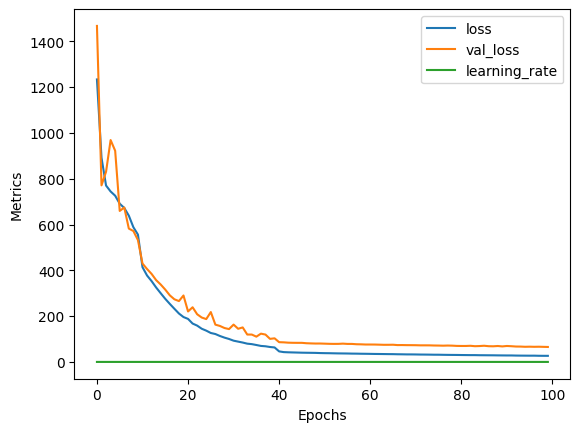

In [8]:
ftype = 'json'
cnn_model_history_name = '{}_{}_{}.{}'.format(dataset_name, modeltype, 'history', ftype) 
cnn_model_history_path = os.path.join(cnn_model_files_dir, cnn_model_history_name)
with open(cnn_model_history_path, "w") as file: 
    json.dump({'history': history.history}, file, indent=4)
nprint('CNN model history path', cnn_model_history_path)
display_training_performance(history)

<h2>Creation of a .zip file for uploading to Google Drive</h2>

In [9]:
ftype = 'zip'
shutil.make_archive(cnn_model_files_dir, ftype, cnn_model_files_dir)
shutil.rmtree(cnn_model_files_dir)